In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

In [3]:
import torchxrayvision as xrv

In [4]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/lustre04/scratch/cohenjos/NIH/images-224")


In [5]:
d_nih

{'Atelectasis': {0.0: 27277, 1.0: 1591},
 'Cardiomegaly': {0.0: 28147, 1.0: 721},
 'Consolidation': {0.0: 28489, 1.0: 379},
 'Edema': {0.0: 28828, 1.0: 40},
 'Effusion': {0.0: 27568, 1.0: 1300},
 'Emphysema': {0.0: 28603, 1.0: 265},
 'Fibrosis': {0.0: 28302, 1.0: 566},
 'Hernia': {0.0: 28787, 1.0: 81},
 'Infiltration': {0.0: 25454, 1.0: 3414},
 'Mass': {0.0: 27661, 1.0: 1207},
 'Nodule': {0.0: 27267, 1.0: 1601},
 'Pleural_Thickening': {0.0: 28123, 1.0: 745},
 'Pneumonia': {0.0: 28707, 1.0: 161},
 'Pneumothorax': {0.0: 28604, 1.0: 264}}


NIH_Dataset num_samples=28868 views=['PA']

In [6]:
d_nih.csv.iloc[0]

Patient ID                                    1
Image Index                    00000001_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient Age                                058Y
Patient Gender                                M
View Position                                PA
OriginalImage[Width                        2682
Height]                                    2749
OriginalImagePixelSpacing[x               0.143
y]                                        0.143
Unnamed: 11                                 NaN
Name: 0, dtype: object

{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

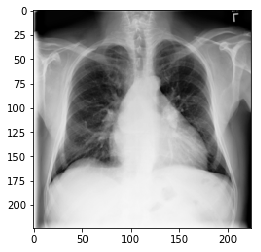

In [8]:
sample = d_nih[0]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [9]:
d_pc = xrv.datasets.PC_Dataset(imgpath="/lustre04/scratch/cohenjos/PC/images-224")


In [10]:
d_pc

{'Atelectasis': {0.0: 59674, 1.0: 2441},
 'Cardiomegaly': {0.0: 56725, 1.0: 5390},
 'Consolidation': {0.0: 61621, 1.0: 494},
 'Edema': {0.0: 62007, 1.0: 108},
 'Effusion': {0.0: 60478, 1.0: 1637},
 'Emphysema': {0.0: 61569, 1.0: 546},
 'Fibrosis': {0.0: 61774, 1.0: 341},
 'Fracture': {0.0: 60450, 1.0: 1665},
 'Hernia': {0.0: 61127, 1.0: 988},
 'Infiltration': {0.0: 57677, 1.0: 4438},
 'Mass': {0.0: 61608, 1.0: 507},
 'Nodule': {0.0: 59921, 1.0: 2194},
 'Pleural_Thickening': {0.0: 60039, 1.0: 2076},
 'Pneumonia': {0.0: 60064, 1.0: 2051},
 'Pneumothorax': {0.0: 62017, 1.0: 98}}


PC_Dataset num_samples=62115

In [11]:
tr = xrv.datasets.XRayResizer(224)

In [12]:
data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

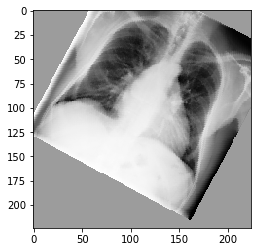

In [14]:
a = data_transforms(tr(sample["img"]))
plt.imshow(a[0], cmap="Greys_r")

In [15]:
d_chex = xrv.datasets.CheX_Dataset(imgpath="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small",
                                   csvpath="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small/train.csv")


In [16]:
d_chex

{'Atelectasis': {0.0: 5007, 1.0: 2460},
 'Cardiomegaly': {0.0: 6500, 1.0: 2117},
 'Consolidation': {0.0: 8826, 1.0: 1125},
 'Edema': {0.0: 7576, 1.0: 1330},
 'Effusion': {0.0: 9272, 1.0: 5206},
 'Enlarged Cardiomediastinum': {0.0: 7694, 1.0: 1100},
 'Fracture': {0.0: 5092, 1.0: 1115},
 'Lung Lesion': {0.0: 5158, 1.0: 1655},
 'Lung Opacity': {0.0: 5544, 1.0: 7006},
 'Pleural Other': {0.0: 4935, 1.0: 782},
 'Pneumonia': {0.0: 5247, 1.0: 992},
 'Pneumothorax': {0.0: 9208, 1.0: 1060},
 'Support Devices': {0.0: 5334, 1.0: 4375}}


CheX_Dataset num_samples=20543 views=['PA']

In [17]:
d_nih2 = xrv.datasets.NIH_Google_Dataset(imgpath="/lustre04/scratch/cohenjos/NIH/images-224")


In [18]:
d_nih2

{'Fracture': {0.0: 782, 1.0: 28},
 'Lung Opacity': {0.0: 589, 1.0: 221},
 'Nodule or mass': {0.0: 689, 1.0: 121},
 'Pneumothorax': {0.0: 764, 1.0: 46}}


NIH_Google_Dataset num_samples=810 views=['PA']

{'Atelectasis': 0.0, 'Cardiomegaly': 0.0, 'Consolidation': 0.0, 'Edema': 0.0}

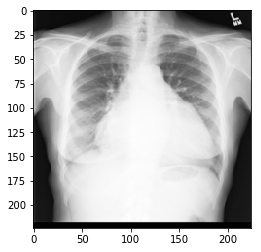

In [20]:
sample = d_nih2[0]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [21]:
d_mimic_chex = xrv.datasets.MIMIC_Dataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          imgpath="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-chexpert.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz")


In [22]:
d_mimic_chex

{'Atelectasis': {0.0: 30954, 1.0: 4077},
 'Cardiomegaly': {0.0: 32312, 1.0: 3743},
 'Consolidation': {0.0: 32297, 1.0: 816},
 'Edema': {0.0: 33610, 1.0: 1157},
 'Effusion': {0.0: 33401, 1.0: 3713},
 'Enlarged Cardiomediastinum': {0.0: 31505, 1.0: 692},
 'Fracture': {0.0: 30961, 1.0: 972},
 'Lung Lesion': {0.0: 31033, 1.0: 1321},
 'Lung Opacity': {0.0: 31175, 1.0: 5426},
 'Pleural Other': {0.0: 30869, 1.0: 465},
 'Pneumonia': {0.0: 33347, 1.0: 2176},
 'Pneumothorax': {0.0: 33651, 1.0: 560},
 'Support Devices': {0.0: 31152, 1.0: 1970}}


MIMIC_Dataset num_samples=45628 views=['PA']

In [23]:
d_mimic_negbio = xrv.datasets.MIMIC_Dataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          imgpath="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-negbio.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz")


In [24]:
d_mimic_negbio

{'Atelectasis': {0.0: 32058, 1.0: 4048},
 'Cardiomegaly': {0.0: 33431, 1.0: 3275},
 'Consolidation': {0.0: 33564, 1.0: 762},
 'Edema': {0.0: 34731, 1.0: 1121},
 'Effusion': {0.0: 34489, 1.0: 3595},
 'Enlarged Cardiomediastinum': {0.0: 32641, 1.0: 660},
 'Fracture': {0.0: 32320, 1.0: 696},
 'Lung Lesion': {0.0: 32187, 1.0: 1271},
 'Lung Opacity': {0.0: 32371, 1.0: 5301},
 'Pleural Other': {0.0: 32012, 1.0: 450},
 'Pneumonia': {0.0: 34479, 1.0: 2042},
 'Pneumothorax': {0.0: 34760, 1.0: 500},
 'Support Devices': {0.0: 32267, 1.0: 1856}}


MIMIC_Dataset num_samples=45628 views=['PA']

{'Atelectasis': 0.0,
 'Cardiomegaly': 0.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Enlarged Cardiomediastinum': 0.0,
 'Fracture': 0.0,
 'Lung Lesion': 0.0,
 'Lung Opacity': 0.0,
 'Effusion': 0.0,
 'Pleural Other': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0,
 'Support Devices': 0.0}

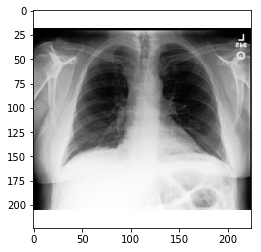

In [26]:
sample = d_mimic_chex[15011]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_mimic_chex.pathologies,sample["lab"]))

In [27]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

In [28]:
d_openi = xrv.datasets.Openi_Dataset(imgpath="/lustre03/project/6008064/jpcohen/OpenI/images",
                                    transform=transform)

In [29]:
d_openi

{'Atelectasis': {0.0: 2996, 1.0: 271},
 'Calcified Granuloma': {0.0: 3074, 1.0: 193},
 'Cardiomegaly': {0.0: 3082, 1.0: 185},
 'Edema': {0.0: 3217, 1.0: 50},
 'Effusion': {0.0: 3147, 1.0: 120},
 'Emphysema': {0.0: 3183, 1.0: 84},
 'Fibrosis': {0.0: 3250, 1.0: 17},
 'Fracture': {0.0: 3189, 1.0: 78},
 'Granuloma': {0.0: 2914, 1.0: 353},
 'Hernia': {0.0: 3226, 1.0: 41},
 'Infiltration': {0.0: 3201, 1.0: 66},
 'Lung Lesion': {0.0: 3264, 1.0: 3},
 'Lung Opacity': {0.0: 2940, 1.0: 327},
 'Mass': {0.0: 3261, 1.0: 6},
 'Nodule': {0.0: 3199, 1.0: 68},
 'Pleural_Thickening': {0.0: 3237, 1.0: 30},
 'Pneumonia': {0.0: 3199, 1.0: 68},
 'Pneumothorax': {0.0: 3253, 1.0: 14}}


Openi_Dataset num_samples=3267

{'Atelectasis': 0.0,
 'Calcified Granuloma': 0.0,
 'Cardiomegaly': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Fracture': 0.0,
 'Granuloma': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Lung Lesion': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Lung Opacity': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

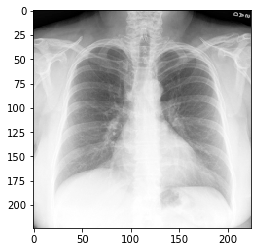

In [30]:
sample = d_openi[0]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_openi.pathologies,sample["lab"]))

In [31]:
pathologies = [  'Atelectasis',
                 'Consolidation',
                 'Infiltration',
                 'Pneumothorax',
                 'Edema',
                 'Emphysema',
                 'Fibrosis',
                 'Effusion',
                 'Pneumonia',
                 'Pleural_Thickening',
                 'Cardiomegaly',
                 'Nodule',
                 'Mass',
                 'Hernia',
                 'Lung Lesion',
                 'Fracture',
                 'Lung Opacity',
                 'Enlarged Cardiomediastinum'
                ]

In [32]:
print(d_nih.__class__)
xrv.datasets.relabel_dataset(pathologies, d_nih)
print(d_pc.__class__)
xrv.datasets.relabel_dataset(pathologies, d_pc)
print(d_chex.__class__)
xrv.datasets.relabel_dataset(pathologies, d_chex)

<class 'torchxrayvision.datasets.NIH_Dataset'>
Lung Lesion doesn't exist. Adding nans instead.
Fracture doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'torchxrayvision.datasets.PC_Dataset'>
Lung Lesion doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'torchxrayvision.datasets.CheX_Dataset'>
{'Support Devices', 'Pleural Other'} will be dropped
Infiltration doesn't exist. Adding nans instead.
Emphysema doesn't exist. Adding nans instead.
Fibrosis doesn't exist. Adding nans instead.
Pleural_Thickening doesn't exist. Adding nans instead.
Nodule doesn't exist. Adding nans instead.
Mass doesn't exist. Adding nans instead.
Hernia doesn't exist. Adding nans instead.


In [33]:
dd = xrv.datasets.Merge_Dataset([d_nih, d_pc, d_chex])

In [34]:
dd

{'Atelectasis': {0.0: 91958, 1.0: 6492},
 'Cardiomegaly': {0.0: 91372, 1.0: 8228},
 'Consolidation': {0.0: 98936, 1.0: 1998},
 'Edema': {0.0: 98411, 1.0: 1478},
 'Effusion': {0.0: 97318, 1.0: 8143},
 'Emphysema': {0.0: 90172, 1.0: 811},
 'Enlarged Cardiomediastinum': {0.0: 7694, 1.0: 1100},
 'Fibrosis': {0.0: 90076, 1.0: 907},
 'Fracture': {0.0: 65542, 1.0: 2780},
 'Hernia': {0.0: 89914, 1.0: 1069},
 'Infiltration': {0.0: 83131, 1.0: 7852},
 'Lung Lesion': {0.0: 5158, 1.0: 1655},
 'Lung Opacity': {0.0: 5544, 1.0: 7006},
 'Mass': {0.0: 89269, 1.0: 1714},
 'Nodule': {0.0: 87188, 1.0: 3795},
 'Pleural_Thickening': {0.0: 88162, 1.0: 2821},
 'Pneumonia': {0.0: 94018, 1.0: 3204},
 'Pneumothorax': {0.0: 99829, 1.0: 1422}}


Merge_Dataset num_samples=111526